In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
dataset=pd.read_csv("dataset\Cleaned_dataset.csv")
df=dataset

In [3]:
df.rename(columns={'Class': 'Classes'}, inplace=True)
df

,Date_of_journey,Journey_day,Airline,Flight_code,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,2023-03-06,Monday,Vistara,UK-926,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028
452084,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452085,2023-03-06,Monday,Vistara,UK-918,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254
452086,2023-03-06,Monday,Vistara,UK-946,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980


In [4]:
df.columns

Index(['Date_of_journey', 'Journey_day', 'Airline', 'Flight_code', 'Classes',
       'Source', 'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Classes            452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [6]:
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

# Extract features from "Date_of_journey" column
df['Year'] = df['Date_of_journey'].dt.year
df['Month'] = df['Date_of_journey'].dt.month
df['Day'] = df['Date_of_journey'].dt.day
df['Day_of_week'] = df['Date_of_journey'].dt.dayofweek

# Drop the original "Date_of_journey" column
df.drop('Date_of_journey', axis=1, inplace=True)

In [7]:
df.drop('Journey_day', axis=1, inplace=True)

In [8]:
df.drop('Flight_code', axis=1, inplace=True)

In [9]:
df

,Airline,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Year,Month,Day,Day_of_week
0,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,2023,1,16,0
1,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,2023,1,16,0
2,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,2023,1,16,0
3,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,2023,1,16,0
4,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,2023,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,65028,2023,3,6,0
452084,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254,2023,3,6,0
452085,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,69254,2023,3,6,0
452086,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,72980,2023,3,6,0


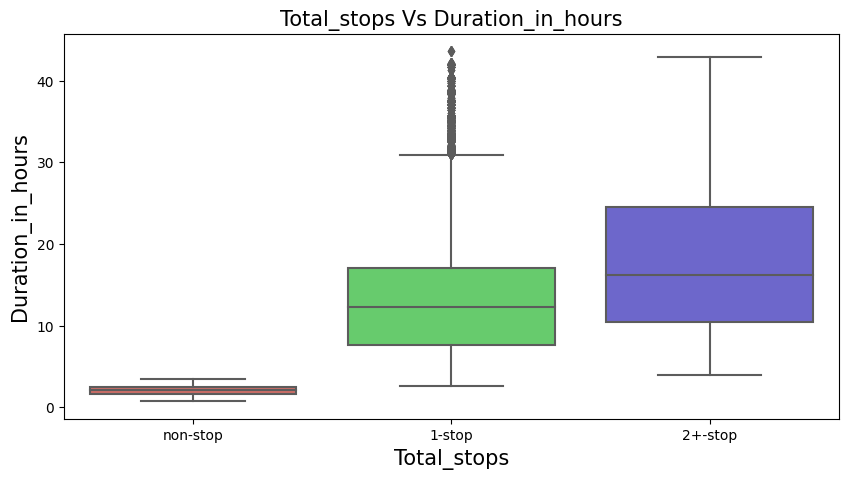

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Total_stops',y='Duration_in_hours',data=df,palette='hls')
plt.title('Total_stops Vs Duration_in_hours',fontsize=15)
plt.xlabel('Total_stops',fontsize=15)
plt.ylabel('Duration_in_hours',fontsize=15)
plt.show()

In [11]:
X = df.drop(columns=['Fare'],axis=1)
y = df['Fare']

In [12]:
X

,Airline,Classes,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Year,Month,Day,Day_of_week
0,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,2023,1,16,0
1,Indigo,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,2023,1,16,0
2,GO FIRST,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,2023,1,16,0
3,SpiceJet,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,2023,1,16,0
4,Air India,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,2023,1,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
452083,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,13.0833,50,2023,3,6,0
452084,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,2023,3,6,0
452085,Vistara,Business,Ahmedabad,Before 6 AM,1-stop,12 PM - 6 PM,Chennai,11.2500,50,2023,3,6,0
452086,Vistara,Business,Ahmedabad,6 AM - 12 PM,1-stop,After 6 PM,Chennai,11.1667,50,2023,3,6,0


In [13]:
y

0          5335
1          5899
2          5801
3          5794
4          5955
          ...  
452083    65028
452084    69254
452085    69254
452086    72980
452087    72980
Name: Fare, Length: 452088, dtype: int64

In [14]:
num_features = X.select_dtypes(exclude="object").columns
num_features

Index(['Duration_in_hours', 'Days_left', 'Year', 'Month', 'Day',
       'Day_of_week'],
      dtype='object')

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Airline            452088 non-null  object 
 1   Classes            452088 non-null  object 
 2   Source             452088 non-null  object 
 3   Departure          452088 non-null  object 
 4   Total_stops        452088 non-null  object 
 5   Arrival            452088 non-null  object 
 6   Destination        452088 non-null  object 
 7   Duration_in_hours  452088 non-null  float64
 8   Days_left          452088 non-null  int64  
 9   Year               452088 non-null  int64  
 10  Month              452088 non-null  int64  
 11  Day                452088 non-null  int64  
 12  Day_of_week        452088 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 44.8+ MB


In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor


In [18]:
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['Duration_in_hours', 'Days_left']),
        ('cat', categorical_transformer, ['Airline', 'Classes', 'Source', 'Total_stops', 'Arrival', 'Destination'])
    ])


In [19]:
model = RandomForestRegressor()

In [20]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])

In [21]:
pipeline.fit(X_train, y_train)

# Save the pipeline object
import joblib
joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

In [25]:
# Load the pipeline object
pipeline = joblib.load('pipeline.joblib')

# Prepare new data as a pandas dataframe
new_data = pd.DataFrame({
    'Airline': ['Vistara'],
    'Classes': ['Business'],
    'Source': ['Ahmedabad'],
    'Departure': ['6 AM - 12 PM'],
    'Total_stops': ['1-stop'],
    'Arrival': ['After 6 PM'],
    'Destination': ['Chennai'],
    'Duration_in_hours': [13.0833],
    'Days_left': [50],
    'Year': [2023],
    'Month': [3],
    'Day': [6],
    'Day_of_week': [0]
})

# Predict using the pipeline
y_pred = pipeline.predict(new_data)
print(y_pred)


[64739.83]
